In [12]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import pickle
from glob import glob
import seaborn as sns
%matplotlib inline

In [15]:
a = pd.DataFrame(columns = ['a','b','c','d'])
a.loc[0,['a','b','c']] = [1,2,3]
a

,a,b,c,d
0,1,2,3,NaN


$$ y = a \cdot x_1 + (1-a) \cdot I(x_2 \in LEFT\_GROUP) + \sigma $$

$$ x1 - N(0,1) $$

$$ \sigma = 3 $$

In [2]:
df = pd.concat([pd.read_csv(path) for path in glob('results/experiments_results/*.csv')])
df = df[df.columns[1:]]
df.columns = ['model', 'k', 'a','gain','permutation_train','permutation_test', 'shap_train','shap_test']
df.head(2)

,model,k,a,gain,permutation_train,permutation_test,shap_train,shap_test
0,catboost_mean_imputing,10,0.00,0.582627,0.378787,2.364903,0.279371,0.295591
0,catboost_mean_imputing,10,0.05,0.587801,0.371812,2.083838,0.255939,0.268412


In [3]:
df = df.groupby(['model', 'k', 'a']).mean().reset_index()
df.head(2)

,model,k,a,gain,permutation_train,permutation_test,shap_train,shap_test
0,catboost_mean_imputing,2,0.00,0.683284,0.542233,-0.305694,0.362624,0.346784
1,catboost_mean_imputing,2,0.05,0.705568,0.565173,-0.672136,0.385788,0.379550


In [4]:
print(df['k'].unique())
print(sorted(df['a'].unique()))

[  2   4   6   8  10  20  30  40  50  60  70  80  90 100 110 120 130 140
 150 160 170 180 190]
[0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]


In [5]:
def plot_as_function_of_k(df,fi, a):
    temp_df = df[df['a'] == a]
    if fi in ['shap_train','shap_test']:
        temp_df = temp_df[~temp_df['model'].isin(['ours_CartVanilla','ours_Kfold'])]
    cols = ['gain', 'permutation_train', 'permutation_test', 'shap_train', 'shap_test']
    temp_df.loc[:,cols] = 1 - temp_df.loc[:,cols]
    plt.rcParams['figure.figsize'] = [20, 10]
    ax = sns.lineplot(x = 'k', y = fi, hue = 'model', data = temp_df)
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{fi} Feature importance  of the category vaector with K categories as a function of K")
    plt.legend(loc='upper right')
    plt.show()
    
    
def plot_as_function_of_a(df,fi, k):
    temp_df = df[df['k'] == k]
    if fi in ['shap_train','shap_test']:
        temp_df = temp_df[~temp_df['model'].isin(['ours_CartVanilla','ours_Kfold'])]
    cols = ['gain', 'permutation_train', 'permutation_test', 'shap_train', 'shap_test']
    temp_df.loc[:,cols] = 1 - temp_df.loc[:,cols]
    plt.rcParams['figure.figsize'] = [20, 10]
    ax = sns.lineplot(x = 'a', y = fi, hue = 'model', data = temp_df)
    ax.set_xlabel("Number of categories")
    ax.set_ylabel("Feature importance of the category vaector")
    ax.set_title(F"{fi} Feature importance  of the category vaector with {k} categories as a function of a")
    plt.legend(loc='upper right')
    plt.show()

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


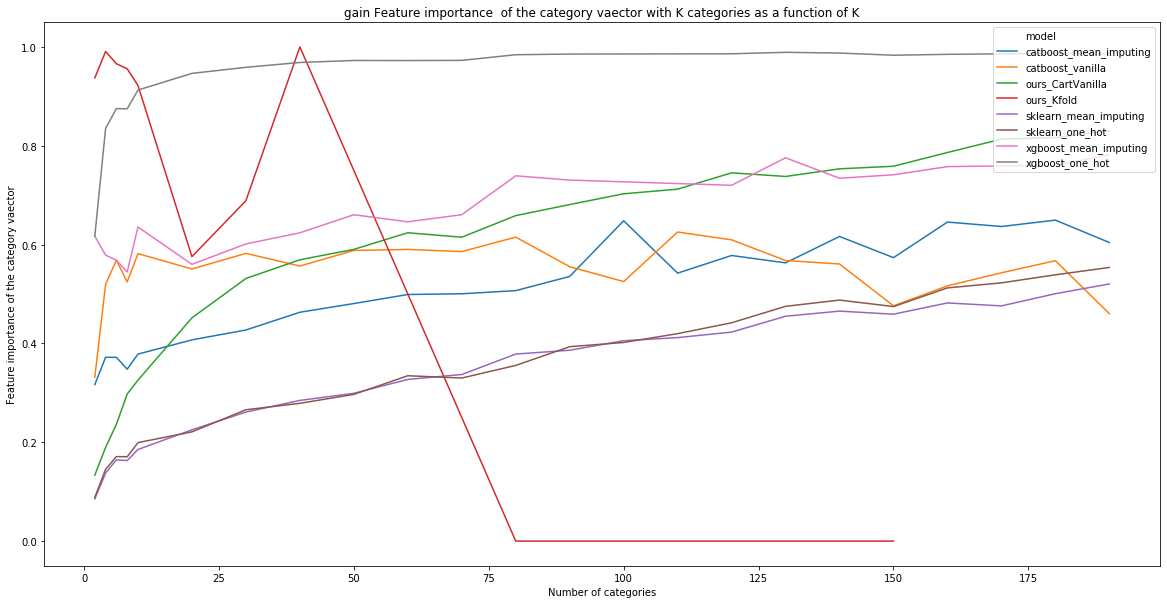

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


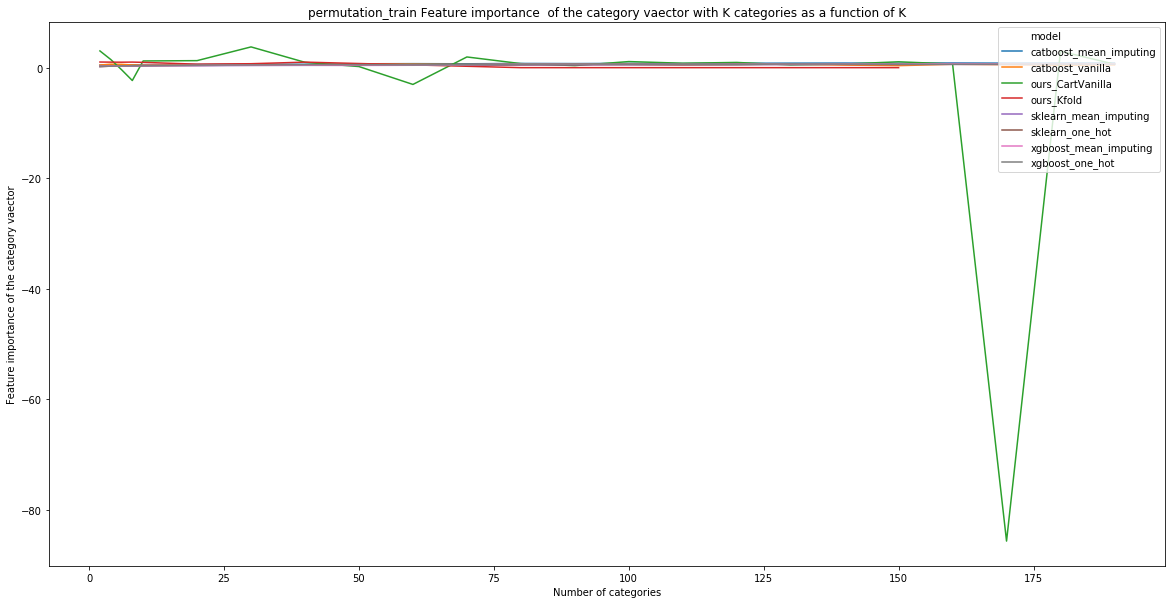

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


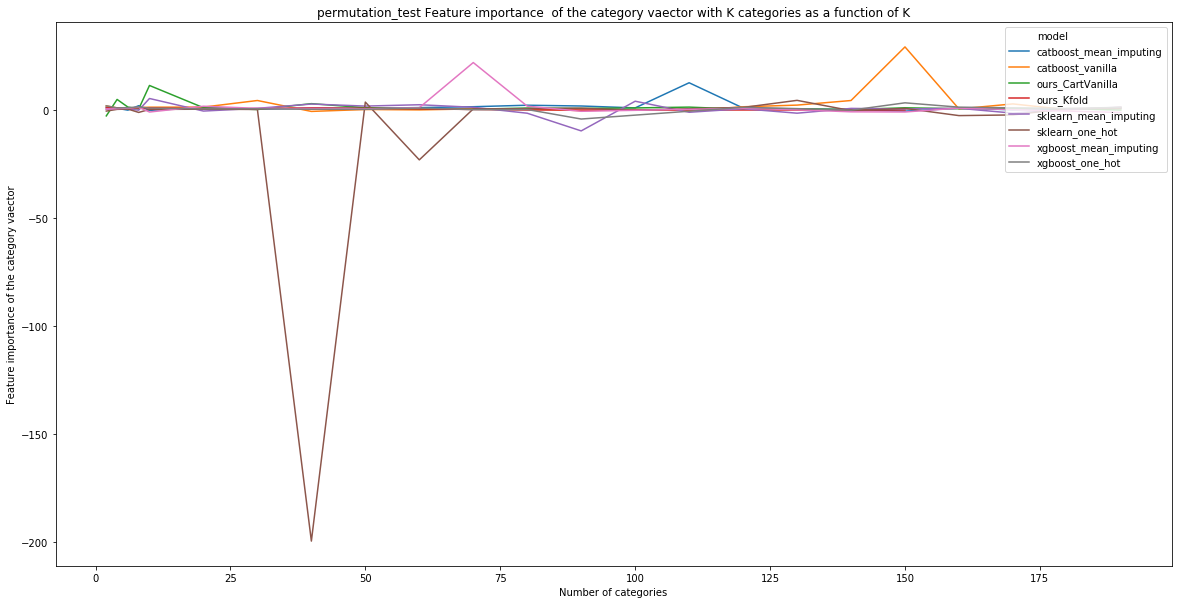

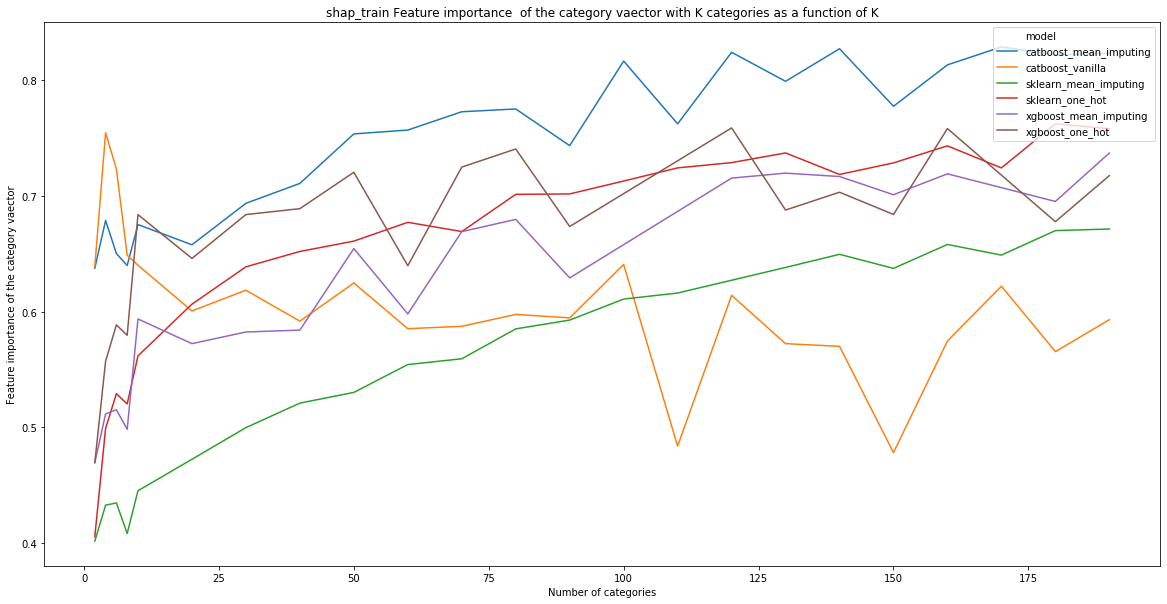

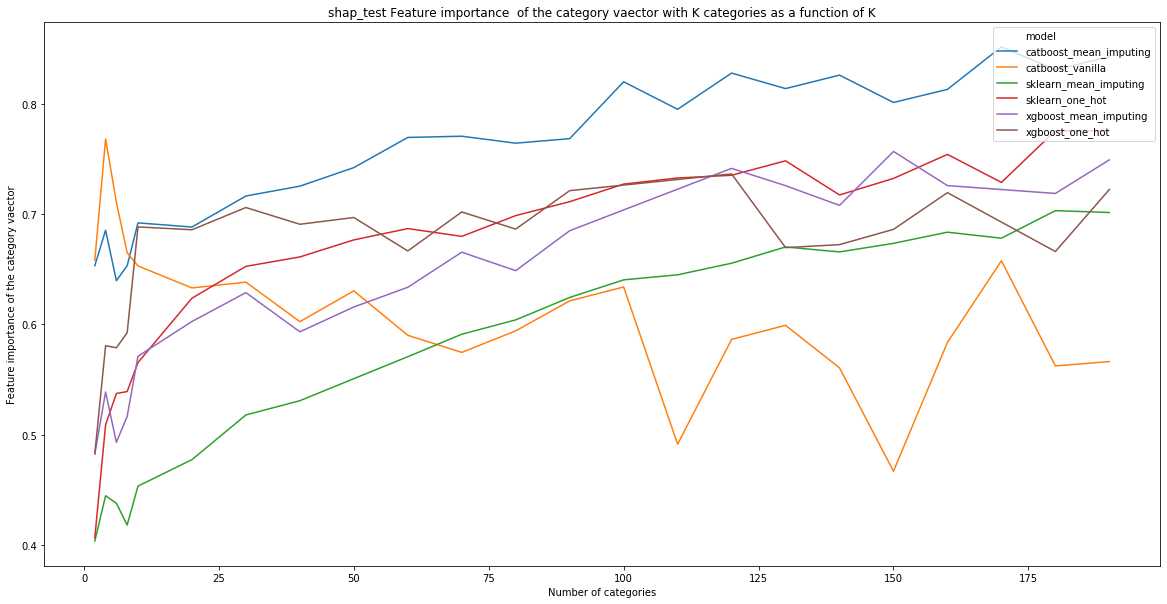

In [10]:
a = 0.
for fi in ['gain','permutation_train','permutation_test', 'shap_train','shap_test']:
    plot_as_function_of_k(df,fi, a)

%matplotlib inline
$$ y = a \cdot x_1 + (1-a) \cdot I(x_2 \in LEFT\_GROUP) + \sigma $$
​
$$ x1 - N(0,1) $$
​
$$ \sigma = 3 $$

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


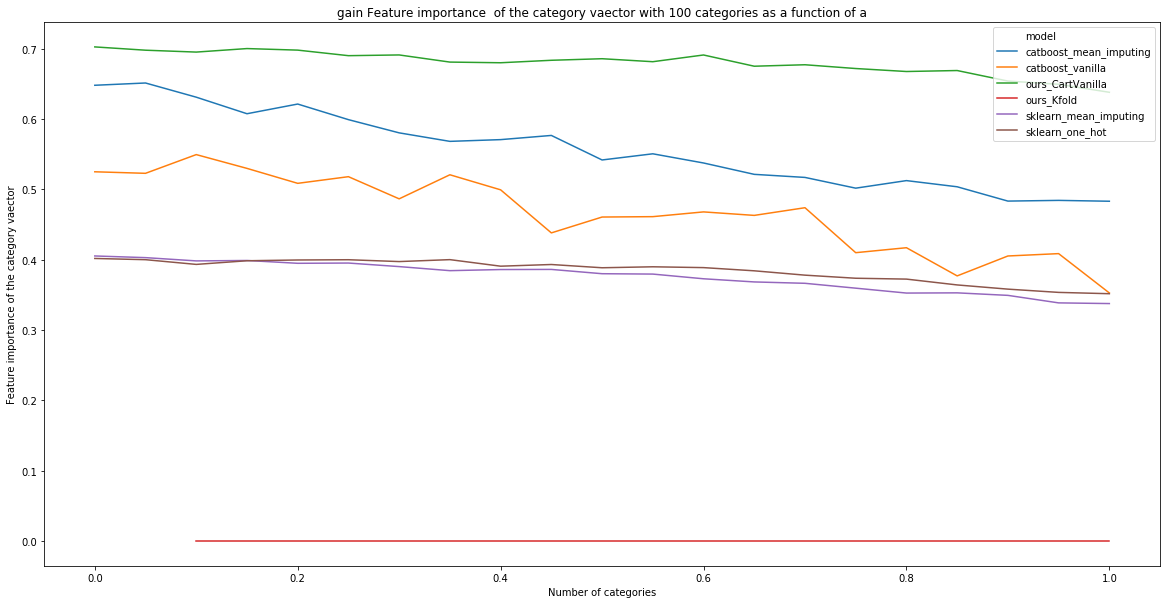

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


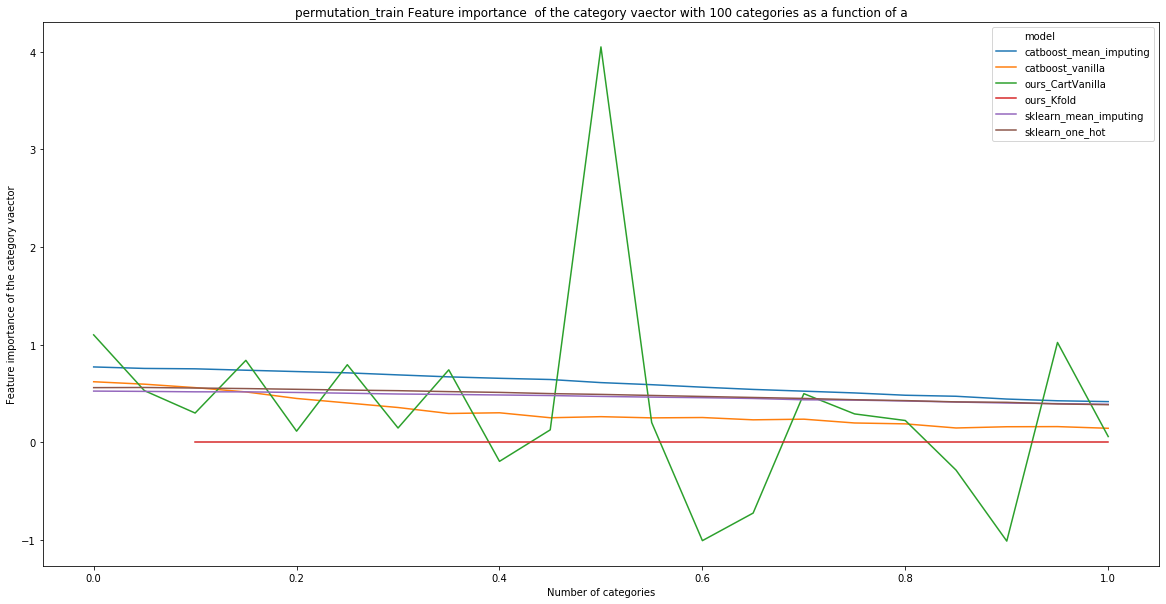

C:\Users\afeki\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


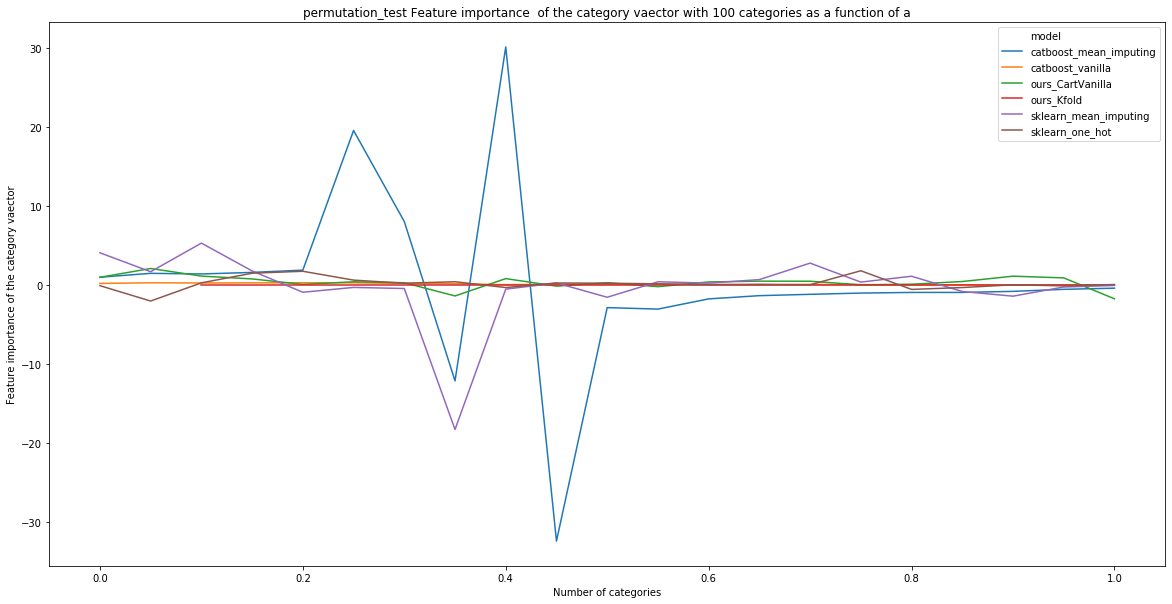

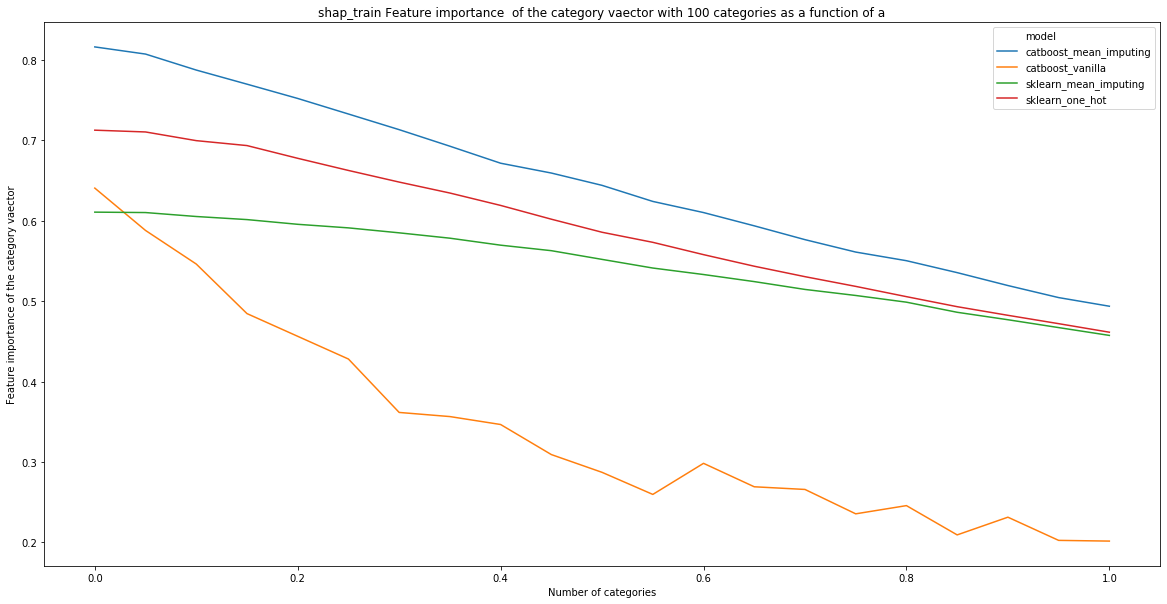

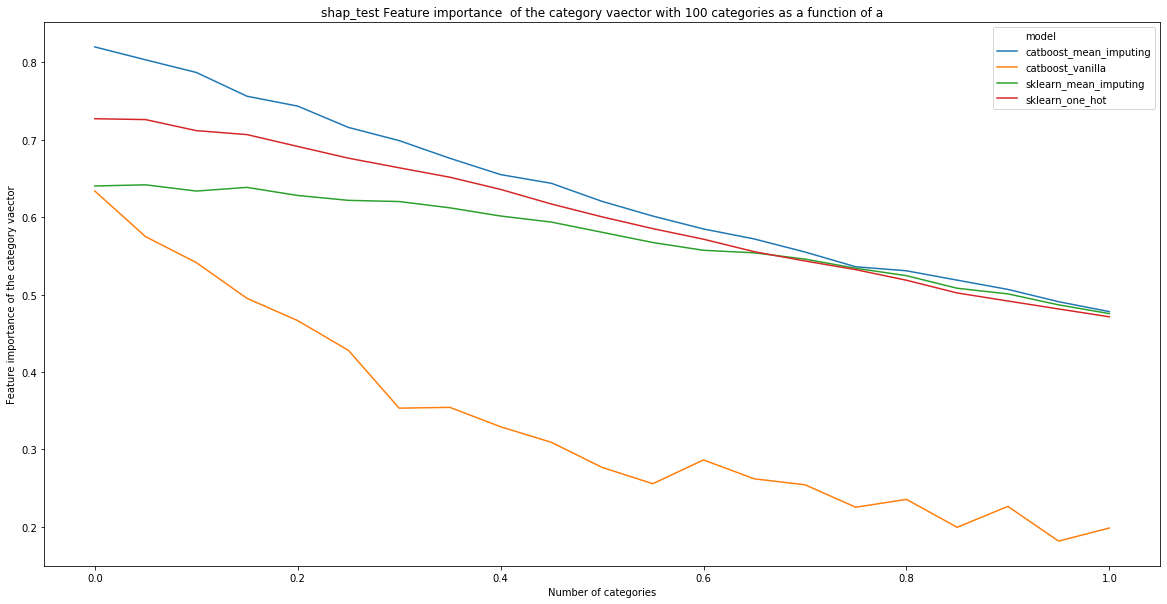

In [11]:
k = 100
for fi in ['gain','permutation_train','permutation_test', 'shap_train','shap_test']:
    plot_as_function_of_a(df,fi, k)

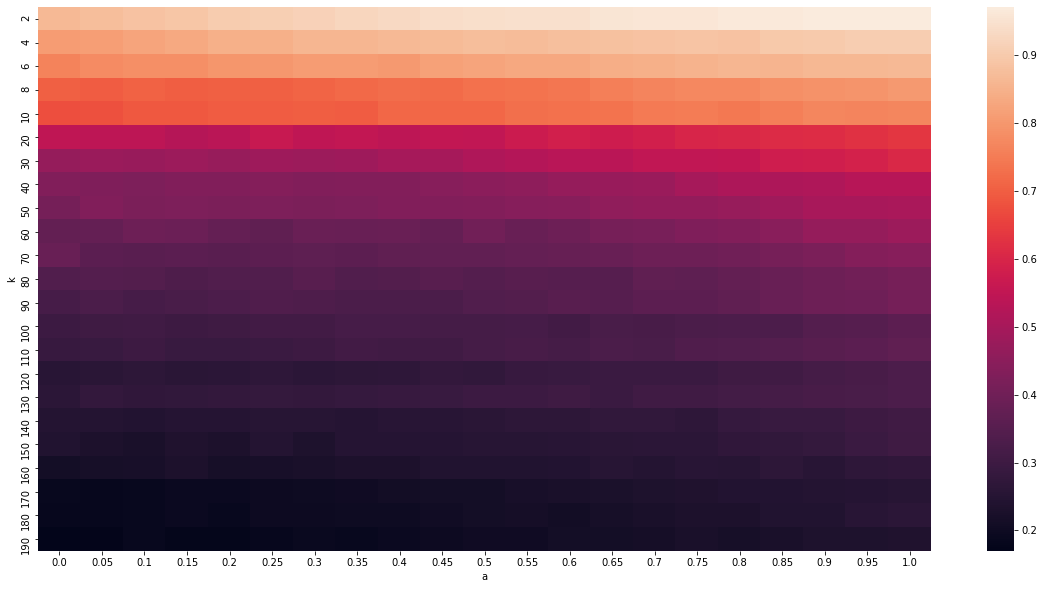

In [8]:
model =  'ours_CartVanilla'
fi = 'gain'
temp_df = df[df['model'] == model].pivot(index='k', columns='a', values= fi)
sns.heatmap(temp_df)

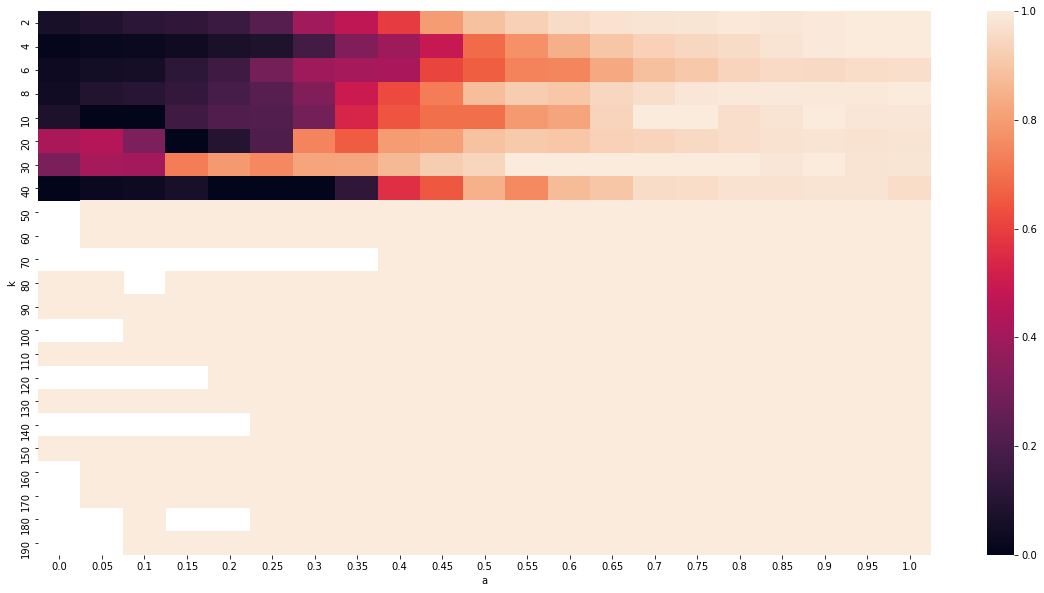

In [9]:
model =  'ours_Kfold'
fi = 'gain'
temp_df = df[df['model'] == model].pivot(index='k', columns='a', values= fi)
sns.heatmap(temp_df)